In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [2]:
C0,C1,C2,C3,C4,C5,e2,e3,vpi2,vpi3,a2,a3,mu2,mu3,n2,m1,m2,m3,I2,I3,l2,l3 = \
symbols('C_0,C_1,C_2,C_3,C_4,C_5,e_2,e_3,varpi_2,varpi_3,a_2,a_3,mu_2,mu_3,\
         n_2,m_1,m_2,m_3,I_2,I_3,lambda_2,lambda_3',real=True)
s,k,alpha = symbols('s,k,alpha',real=True)

Secular Terms

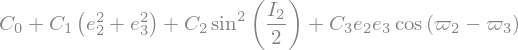

In [3]:
R_D = C0 + C1*(e2**2+e3**2) + C2*sin(I2/2)**2 + C3*e2*e3*cos(vpi3-vpi2)
R_D

In [4]:
R = mu3/a3*R_D

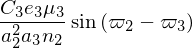

In [5]:
de = diff(R,vpi2)/(-n2*a2**2*e2)
de

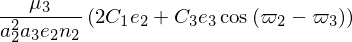

In [6]:
dvpi = diff(R,e2)/n2/a2**2/e2
simplify(dvpi)

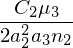

In [7]:
dO = simplify(diff(R,I2)/n2/a2**2/sin(I2))
dO

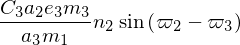

In [8]:
de.subs(mu3,n2**2*a2**3*m3/m1)

Resonant Terms

In [9]:
R_D_res = C4*e2*cos(2*l3 - l2 - vpi2) + C5*e3*cos(2*l3 - l2 - vpi3)
R_D_res

In [10]:
R_E2 = -2*e3*cos(2*l3 - l2 - vpi3)
R_E2

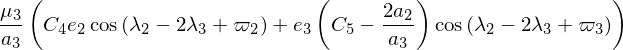

In [11]:
R2 = mu3/a3*R_D_res.subs(C5,C5-2*a2/a3)
R2

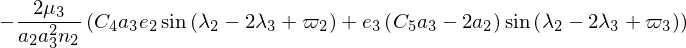

In [12]:
da2 = diff(R2,l2)*2/n2/a2
simplify(da2)

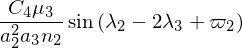

In [13]:
de2 = diff(R2,vpi2)/(-n2*a2**2*e2)
de2

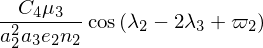

In [14]:
dvpi2 = diff(R2,e2)/n2/a2**2/e2
dvpi2

In [15]:
dO2 = simplify(diff(R2,I2)/n2/a2**2/sin(I2))
dO2

Calculating Laplace Coefficients

In [102]:
lc = lambda s,k,alpha: 2*RisingFactorial(s,abs(k))*hyper([s,s+abs(k)],[abs(k)+1],alpha**2)*alpha**abs(k)/factorial(abs(k))

In [103]:
Dlc = lambda s,k,alpha: s*(lc(s+1,k-1,alpha) - 2*alpha*lc(s+1,k,alpha)\
                           + lc(s+1,k+1,alpha))

In [104]:
D2lc = lambda s,k,alpha: s*(Dlc(s+1,k-1,alpha) - 2*alpha*Dlc(s+1,k,alpha)\
                           + Dlc(s+1,k+1,alpha) - 2*lc(s+1,k,alpha))

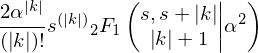

In [105]:
lc(s,k,alpha)

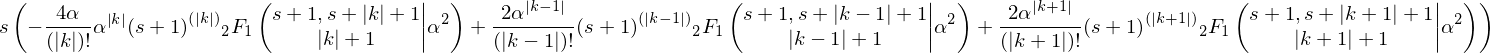

In [106]:
Dlc(s,k,alpha)

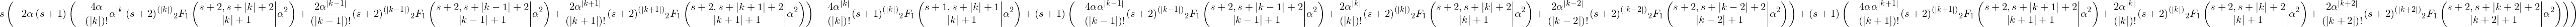

In [107]:
D2lc(s,k,alpha)

a′ = 1, e′ = 0.048, π′ = 0, I′ = 0, and m′/mc = 1/1047.355 with starting conditions a0 = 0.192, e0 = 0.1, π0 = 130◦, 􏱐0 = 200◦, λ0 = 300◦, and λ′ = 0◦. Substitution of α = a/a′ = 0.192 in Eqs. (6.166)–(6.168) gives C1 = 0.0148335, C2 = −0.0593339, and C3 = −0.00708688; note that 2C1 = −C2/2.

In [117]:
C0 = lambda alpha: 0.5*lc(0.5,0,alpha).evalf()
C0(0.192)

In [118]:
C1 = lambda alpha: (2*alpha*Dlc(0.5,0,alpha).evalf() + alpha**2*D2lc(0.5,0,alpha).evalf())/8.0
C1(0.192)

In [119]:
C2 = lambda alpha: lc(1.5,1,alpha).evalf()*-0.5*alpha
C2(0.192)

In [120]:
C3 = lambda alpha: (2*lc(0.5,1,alpha).evalf() - 2*alpha*Dlc(0.5,1,alpha).evalf() - \
      alpha**2*D2lc(0.5,1,alpha).evalf())/4.
C3(0.192)

In [121]:
2*C1(0.192) + C2(0.192)/2